In [1]:
import matplotlib.pyplot as plt

import pandas as pd
import numpy as np

In [10]:
df = pd.read_csv('data.csv')
df

,SALT,TEMP,VOLTAGE
0,NaCl,71.1,3.48
1,NaCl,55.5,3.55
2,NaCl,48.7,3.59
3,NaCl,40.7,3.64
4,NaCl,31.0,3.43
5,NaCl,25.5,3.35
6,KCl,77.3,3.48
7,KCl,58.6,3.55
8,KCl,46.8,3.59
9,KCl,36.9,3.64


In [18]:
def transfer_function(Vo, Vs=4.5):
    """ Return %RH given voltage output and supply voltage. """
    
    return ((Vo / Vs) - 0.16) / 0.0062

def temperature_compensation(RH, T):
    """ Give true true relative humidity given sensor relative humidity and temperature. """
    
    return RH / (1.0546 - 0.00216 * T)

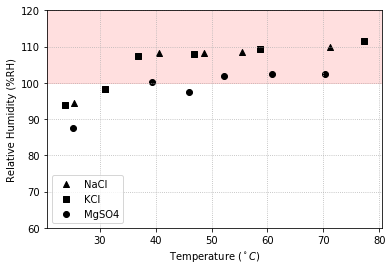

In [33]:
plt.scatter(df[df['SALT'] == 'NaCl' ]['TEMP'], temperature_compensation(transfer_function(df[df['SALT'] == 'NaCl' ]['VOLTAGE']), df[df['SALT'] == 'NaCl' ]['TEMP']), label='NaCl',  marker='^', c='k')
plt.scatter(df[df['SALT'] == 'KCl'  ]['TEMP'], temperature_compensation(transfer_function(df[df['SALT'] == 'KCl'  ]['VOLTAGE']), df[df['SALT'] == 'KCl'  ]['TEMP']), label='KCl',   marker='s', c='k')
plt.scatter(df[df['SALT'] == 'MgSO4']['TEMP'], temperature_compensation(transfer_function(df[df['SALT'] == 'MgSO4']['VOLTAGE']), df[df['SALT'] == 'MgSO4']['TEMP']), label='MgSO4', marker='o', c='k')

plt.xlabel('Temperature ($^\circ C$)')
plt.ylabel('Relative Humidity (%RH)')

plt.grid(linestyle=':')
plt.legend()

plt.axhspan(100, 1000, color='red', alpha=0.125, zorder=0)
plt.ylim((60, 120))

plt.show()